In [1]:
import numpy as np
from ase import Atoms
from ase.dft.kpoints import monkhorst_pack
from ase.dft.kpoints import bandpath
import sys
sys.path.append("..")
from fireballpy import Fireball
from ase.dft.dos import DOS

a = 5.46
atoms = Atoms(symbols=['Si', 'Si'],
        positions=[( 0.0000, 0.0000, 0.0000),
                       (    a/4,    a/4,    a/4)])  
atoms.set_cell([(0,a/2, a/2), (a/2, 0, a/2), (a/2, a/2,0)])
        
charges=np.array([[1.3963999 , 2.47211926, 0.13149041],
                  [1.39639524, 2.47208974, 0.13150545]])
kpoints = monkhorst_pack([4, 4, 4])

In [2]:
atoms.calc = Fireball(charges_method='mdp', 
                      kpts=kpoints, shell_charges=charges)
atoms.get_potential_energy()

-211.81022175860488

In [12]:
dos = DOS(atoms.calc, width=0.8, window=(0, 20))

In [13]:
d = dos.get_dos()
e = dos.get_energies()

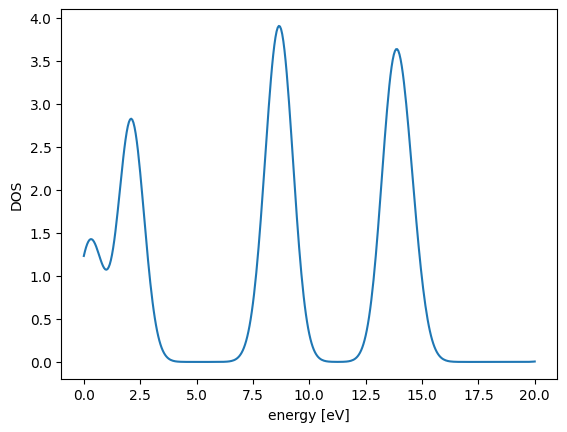

In [14]:
import matplotlib.pyplot as plt
plt.plot(e, d)
plt.xlabel('energy [eV]')
plt.ylabel('DOS')
plt.show()